# Applied Data Science Final Project - Gapminder Dataset

#### Author: Izolda Fetko
#### Date: 4/19/2019
#### Semester: Spring 2019
#### Course: INFO-I590-9772 Applied Data Science

The purpose of this project is to explore the Gapminder dataset (gapminder.csv) provided via Canvas by the teaching staff. 

### 1. Questions

Some questions I would be curious to answer from this dataset would be:

 - What is the distribution of the life expectancy data by region?
 - What are the regions with the highest and lowest life expectancy?
 - Which regions contain the highest number of outliers when it comes to life expectancy?
 - How did the life expectancy change over the years for the entire population recorded in this dataset?
 - What is the correlation between the variables?
 - Is there a high correlation between the life expectancy and income?
 - How is the income generally distributed accros the population?
 - What are the countries with the highest average income and what regions do they belong to?
 - Is the data normally distributed?
 - Do the residulats exhibit heteroscedasticity or homoscedasticity?
 - What is the best number of clusters to cluster/classify the data?
 - Can we predict values based on the current data and does the K-Means clustering analysis tell us?

### 2. Dataset Import

In order to be able to certain commands and visualize the data, first we need to import the Python packages such numpy, pandas, seaborn and matplotlib.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

To import the data, we will be using the pandas option read_csv. Since the dataset already includes column names, we can avoid specifying the header option.

Please note that I am using my husband's old computer (his name is Jusin) for the purpose of this class and this project.

In [3]:
gapminder = pd.read_csv(r"C:\Users\Justin\Dropbox\IU\INFO I590 APPLIED DATA SCIENCE\Final Project\gapminder.csv")

### 3. Dataset Description

Once the data is imported, we can quickly inspect it by running the head() command, which allows us to see top 5 rows of the dataset.

In [4]:
gapminder.head()

,Country,Year,life,population,income,region
0,Afghanistan,1800,28.211000,3280000,603.0,South Asia
1,Afghanistan,1801,28.200753,NaN,603.0,South Asia
2,Afghanistan,1802,28.190507,NaN,603.0,South Asia
3,Afghanistan,1803,28.180260,NaN,603.0,South Asia
4,Afghanistan,1804,28.170013,NaN,603.0,South Asia


Similarly to the head() command, we can run the info() command and see how many columns there are in the dataset, the types of variables, and the counts of observations for each column.

In [5]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41284 entries, 0 to 41283
Data columns (total 6 columns):
Country       41284 non-null object
Year          41284 non-null int64
life          41284 non-null float64
population    15467 non-null object
income        38943 non-null float64
region        41284 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB


The dataset contains a total of **41,284** observations (rows) and **6** columns which names are: Country, Year, Life, Population, Income, and Region.

The format of the variables Country, Population, and Region is **object** or string. One thing we can notice here is that the type of the Population variable should actually be a number, integer or a float, not an object. 

The type of the life and income variables is **float**, while the type of the Year variable is **integer**.

Missing values can be noticed in the Population and Income columns, as the count of those columns is less than 41,284.

To see specifically how many missing values the *population* and *income* column have, we can run the pd.isnull() command in combination with the value_counts().

In [6]:
print("Population:\n", pd.isnull(gapminder["population"]).value_counts())
print("Income:\n", pd.isnull(gapminder["income"]).value_counts())

Population:
 True     25817
False    15467
Name: population, dtype: int64
Income:
 False    38943
True      2341
Name: income, dtype: int64


From the above breakdown we can see the column *population* has 25,817 missing values, while 15,467 are not missing.
When it comes to the *income* column, there are 2,341 missing and 38,943 non-missing values.

One can also use the describe() function available in the pandas package to generate descriptive statistics which summarize the central tendency, dispersion, and shape of the dataset's distribution. This function excludes NaN values.

In [7]:
gapminder.describe()

,Year,life,income
count,41284.000000,41284.000000,38943.000000
mean,1907.462504,42.884766,4570.795214
std,62.241440,16.220812,10096.543747
min,1800.000000,1.000000,142.000000
25%,1854.000000,31.000000,883.000000
50%,1908.000000,35.118539,1450.000000
75%,1962.000000,55.600000,3483.000000
max,2015.000000,84.100000,182668.000000


From this output, we can clearly see the counts for each variable (observations), the mean value, standard deviation, minimum and maximum values, along with the percentile values.

### 4. Data Clean-Up

Since we have noticed some missing values in the previous steps, we need to spend some time to clean the dataset. One way to clean it up woud be to  remove all observations with missing values. To do this, we can use the dropna command with the axis = 0 option which specifies to drop observations, not columns.

In [8]:
# dropping rows with missing values 
clean_df = gapminder.dropna(axis=0)

Now we can see that we are left with 14,644 observations or non-missing values in each column. Also, we have a new clean dataset, called **clean_df** which I will be using for the rest of the analysis.

In [9]:
print(len(clean_df))

14644


We can also notice that the *populaton* column contains values in two different formats. Some observatons contain numbers with commas for 1000 marks and others dont. To make the column the same format, we need to replace the commas with space, and convert the population variable from string (object) to an integer. This will allow us to conduct analysis on it.

In [10]:
clean_df['population'] = clean_df['population'].str.replace(',','').astype(int)

C:\Users\Justin\NEW\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
# this command also helps format the dataframe

pd.set_option('float_format', '{:f}'.format)

### 5. Exploratory Data Analysis and Visualizations

Now that we have cleaned the dataset, we can run the describe() function again and see that the *population* variable is visible, since I have made it to be numeric.

In [12]:
clean_df.describe()

,Year,life,population,income
count,14644.000000,14644.000000,14644.000000,14644.000000
mean,1961.883775,57.927558,22369733.575458,9369.856801
std,50.275637,15.435966,93387398.800881,15131.535662
min,1800.000000,4.000000,2128.000000,142.000000
25%,1955.000000,47.059930,778463.000000,1428.000000
50%,1975.000000,61.230940,3800780.500000,3705.000000
75%,1995.000000,70.700000,11718485.500000,10715.500000
max,2015.000000,84.100000,1376048943.000000,182668.000000


The first exploratory visualization I will do is the boxplot. Boxplot allows us to see overall patterns of a response group, and compare distributions of variables side by side. In this case, allows us to show a distribution of life expectancy for each individual region.

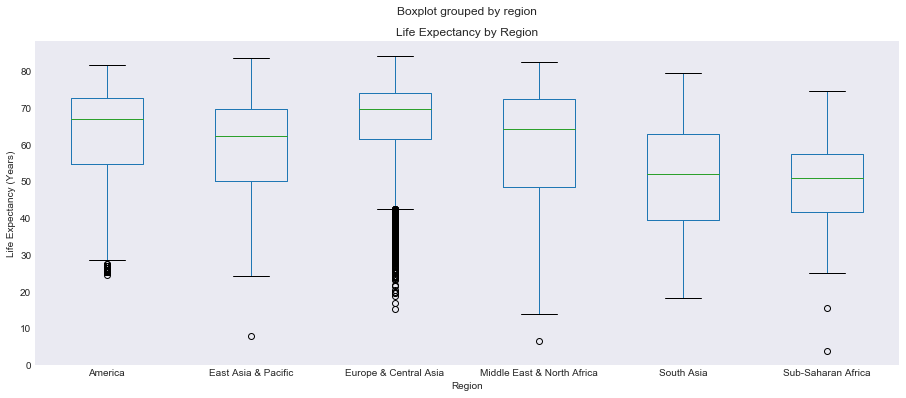

In [14]:
sns.set_style("dark")
clean_df.boxplot(figsize = (15,6), column='life', by='region', grid = False)
plt.title ('Life Expectancy by Region')
plt.xlabel("Region")
plt.ylabel("Life Expectancy (Years)")
plt.savefig('Life Expectancy By Region - Boxplot.png', bbox_inches='tight')

From this boxplot, we can see that Europe & Central Asia have the highest median  life expectancy followed by America. Short boxplots indicate similarity in life expectancy for the particular region, and long boxplots indicate large difference in life expectancy years among the same group. This specific visual allows us to see the basic statistics of a group - the median which represents the middle line. In this case the median is very similar for the first 4 regions and sligly lower for the South Asian and Sub-Saharn Africa. This is in line with the economical and overall development of those regions. The ends of the whiskers indicate minimum and maximum value of the life expectancy. For the American region, we can see that the minumum life expectancy is around 30 years while the number drops significantly for the Middle Eastern and North African region, where the minimum reached 15 years. The end of the upper whisker indicates maximum age, and in this case we can see similarities accros the board, with Europe and Central Asia leading by a few years over America and East Asia and Middle East. The lowest maximum value can be noted for the Sub-Saharan African region. The small circles outside of whiskers indicate outliers, or individuals with life expactancy outside of the usual range. We can notice a small number of outliers in the American, Ease Asian, Middle Easters, and Sub-Saharan regions, while the European region depicts a large number of outliers on the lower side of the boxplot, below the minimum value.

After looking at the overall distribution of the life expectancy by region, we can continue exploring this variable throughout the years. To observe the average life expectancy over the years, we can group the *life* and *year* variables and invoce the mean() method.

In [15]:
avg_life_ex_by_year = clean_df['life'].groupby(clean_df['Year']).mean()

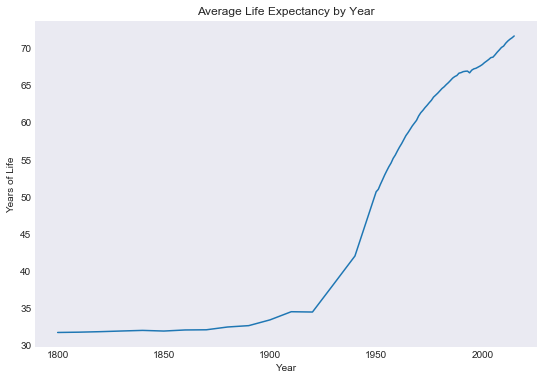

In [16]:
avg_life_ex_by_year.plot(figsize = (9,6))
plt.title ("Average Life Expectancy by Year", fontsize = 12)
plt.ylabel ("Years of Life")
plt.savefig('Average Life Expectancy By Year - Line Chart.png', bbox_inches='tight')

Plotting this allows us to see how the average life expectancy moved throughout the years. We can see that the average life expectancy due to the life conditions in the early 1800's was very low (in the 30's). It maintained a similar trend until after the early 1900's when the overall living conditions improved and medications became widely available to the public. We can see the average life expectancy increase trememndouly in the early 1950 (after WWI and WWII) and peaking in the 2000's where the living conditions increased immensely compared to the 1800's.

The following visualization and analysis I will be conducting is the correlation matrix. The statistical correlation is a very useful method which can tell whether and how strongly two variables are correlated - influenced by each other. To conduct it in this case, we would call the corr() method on the clean dataset that has been created. If the correlation coefficient between two variables is equal to zero, that means that there is no linear relationship between the two variables. If the correlation coefficient is very close to zero (wherether it is positive or negative), this means that there is a weak linear relationship between the two variables. If the correlation coefficient is close to +1 , this means that the two variables are closely correlated. 

In [17]:
clean_df.corr()

,Year,life,population,income
Year,1.000000,0.781358,0.093872,0.298587
life,0.781358,1.000000,0.072875,0.512024
population,0.093872,0.072875,1.000000,-0.011426
income,0.298587,0.512024,-0.011426,1.000000


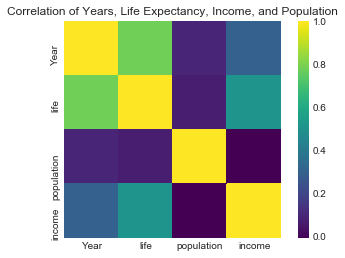

In [19]:
ax = plt.axes()
sns.heatmap(clean_df.corr(), square=True, cmap='viridis', ax=ax)
ax.set_title('Correlation of Years, Life Expectancy, Income, and Population')
plt.savefig('Correlation of Years, Life Expectancy, Income and Population.png', bbox_inches='tight')
plt.show()

From the above visual, we can notice that they yellow fields depict the high correlation. We can ignore those, as they represent the correlation between the same variables : Year-Year, Life-Life, Population-Population, Income-Income. We need to focus on other colors to determine how stong relationships are between the two. For example, we can see the Year-Life relationship is pretty strong as the correlation coefficient is ~ 0.7. Year and Population relationship is not very strong as the correlation coefficient is 0.09, very close to 0. Income-Population relationsnip seems to be very week as well as it is close to the zero -0.01. Another relationship worth mentioning is the Life-Income relationship which is not extremely stong, but is not weak either, as the correlation coefficient is 0.51.

To explore the correlation a bit more, we can create a scatter plot between the income and life expectancy variables. For this purpose, we will be using the lmplot from the Seaborn package, where the x-axis will contain the life expectancy data and the y-axis will represent the income values. To make it more interesting we can add the hue option and color each data point based on the region.

<Figure size 864x504 with 0 Axes>

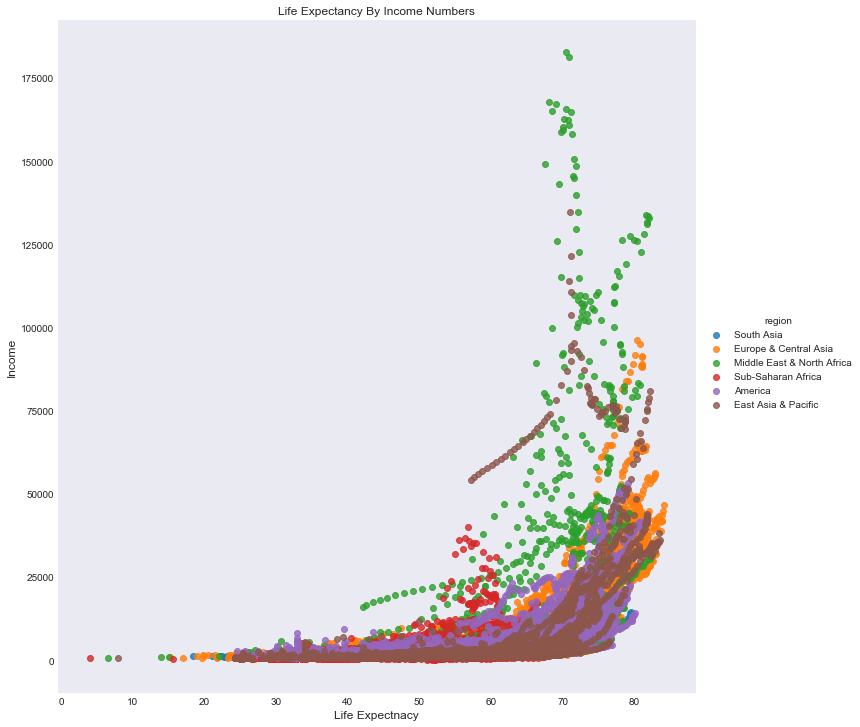

In [20]:
plt.figure(figsize=(12,7))
sns.lmplot(x="life", y="income", data=clean_df, size=10, hue='region', fit_reg=False)
plt.ylabel('Income', fontsize=12)
plt.xlabel('Life Expectnacy', fontsize=12)
plt.title('Life Expectancy By Income Numbers', fontsize=12)
plt.savefig('Life Expectancy by Income Numbers.png', bbox_inches='tight')
plt.show()

From this chart, we can see that there's a correlation between the life expectancy and the levels of income. This indicates that individuals who live in developed countries tend to live longer, have better lives, but also bring in more income. The rich Middle Eastern countries tend to have large amounts of income but also tend to live long lives, perhaps due to the readily avaiable means provided by the income.

Now that we have seen the correlation between the variables, we can focus on the distribution of the income variable. In this case I will be plotting the histogram (distplot in Seaborn) of the income variable with overlaid mean and median indicators.

C:\Users\Justin\NEW\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


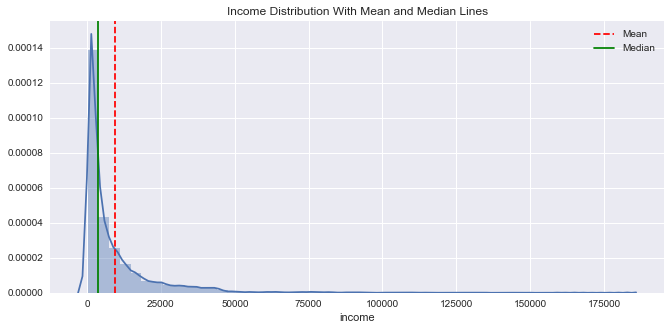

In [21]:
mean=clean_df['income'].mean()
median=clean_df['income'].median()

sns.set_style("dark")
sns.set(rc={'figure.figsize':(11,5)})
sns.distplot(clean_df["income"])
plt.title("Income Distribution With Mean and Median Lines")
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
plt.savefig('Income Distribution With Mean and Median Lines.png', bbox_inches='tight')


From the above graph, we can see that the income distribution is skewed to the right. This is also called a positively skewed distribution. In this case, the mean is usually larger than the median, which can also be abserved in the same visual. This means that the right hand tail is longer (larger) than the tail on the left side of the median. 

I continue to explore the income variable, this time, comparing the average income by country. To be more specific, I focus on the top ten countries with the highest average income. To do this, we first need to group the mean income data by country, sort the values in the descending order and chose top ten values.

In [23]:
average_income_by_country= clean_df.groupby('Country')['income'].mean().sort_values(ascending = False).iloc[0:10]
print(average_income_by_country)

Country
Qatar                  73536.000000
Brunei                 63149.345679
United Arab Emirates   61542.827160
Kuwait                 47941.962963
Luxembourg             40947.617284
Switzerland            33932.259259
Andorra                33553.847826
Norway                 31259.246914
Saudi Arabia           29955.197531
Bahrain                28488.012346
Name: income, dtype: float64


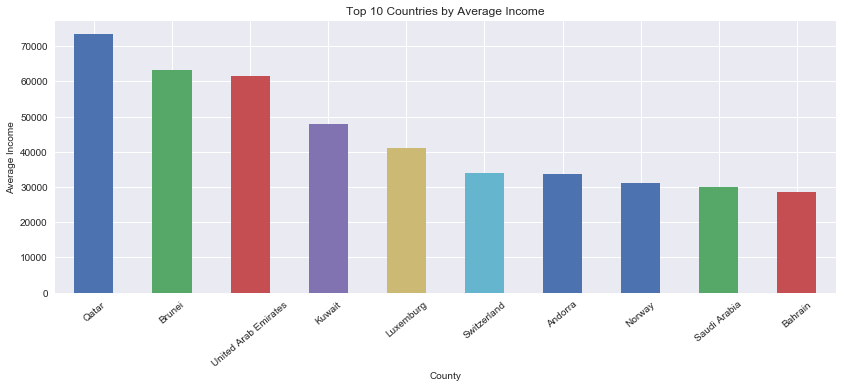

In [24]:
average_income_by_country.plot(kind = 'bar', figsize = (14, 5), title = "Top 10 Countries by Average Income")
countries =  ['Qatar', 'Brunei', 'United Arab Emirates', 'Kuwait', 'Luxemburg', 'Switzerland', 'Andorra', 'Norway', 'Saudi Arabia', 'Bahrain']
plt.xticks(range(len(countries)), countries, rotation = 40)
plt.xlabel('County', fontsize=10)
plt.ylabel('Average Income', fontsize=10)
plt.savefig('Top 10 Countries by Average Income.png', bbox_inches='tight')

When we plot this, we can see that Qatar is the country with the highest average income, followed by Brunei and UAE. The only countries that do not belong in the Middle Eastern region and that have a very high average income are Luxemburg, Switzerland, Andora, and Norway.

### Linear Regression

For the purpose of the linear regression analysis we need to use the scikit learn model.The model works by using the independent and dependent variable. The first argument of the model takes in is the independent variable, in this case the Life (life expectancy) and the second argument is the dependent variable we are trying to predict - in this case Income.

In [26]:
import numpy as np
import pandas as pd

# define the variables x and y
x = np.array(clean_df['life'])
y = np.array(clean_df['income'])
data = pd.DataFrame({'x':x, 'y':y})

#create temp data frame and y_temp
data_temp = data.dropna()
y_temp = data_temp.y
data_temp = data_temp.drop('y', axis = 1)  #drop target from dataframe

# import linear model from sklearn
from sklearn import linear_model

# initialize the model
lm = linear_model.LinearRegression()

# fit method trains the data
# The first argument is the independent variable, the second one is the dependent variable we're trying to predict.
lm.fit(data_temp, y_temp)
pred = lm.predict(data_temp)

# print linenar model coefficient and the intercept
print("Linear model coefficient is:", lm.coef_)
print("Intercept is:", lm.intercept_)

Linear model coefficient is: [ 501.92577296]
Intercept is: -19705.4777064


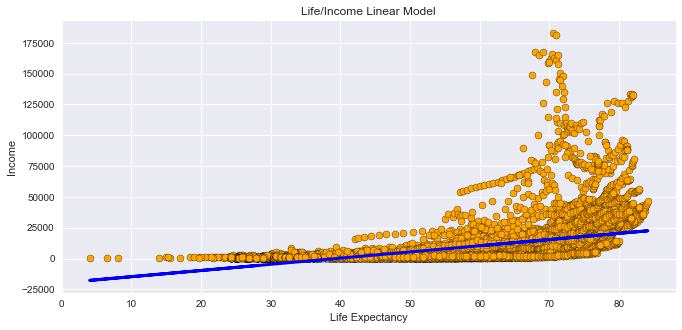

In [30]:
# We can also plot the data and the lm line

plt.scatter(x, y,  color='orange', edgecolors = 'black')
plt.plot(data_temp, pred, color='blue', linewidth=3)
plt.title("Life/Income Linear Model")
plt.xlabel ("Life Expectancy")
plt.ylabel("Income")
plt.savefig('Life and Income Linear Model.png', bbox_inches='tight')
plt.show()

In [31]:
# we can also use this model to predict values of income based on the age
predicted_income = lm.predict(76)
print(predicted_income)

[ 18440.88103837]


In [32]:
# to predict multiple we just pass in a list of life expectancies

predicted_income = lm.predict([[24], [50], [45], [37]])
print(predicted_income)

[-7659.25915544  5390.81094147  2881.18207668 -1134.22410698]


Negative predicted values indicate that the model can be improved. As the variable income cannot be negative in this case.

#### Regression Assumption Testing

In the following segment, I am using the Ordinary Least Squares to fit the model. Using this model we can easily generate OLS Regression Results.

In [39]:
# import statsmodels formula api
import statsmodels.formula.api as smf

In [66]:
# gapminder model creation with osl
gapminder_model = 'income ~ life'

In [67]:
# use the ordinary least squares and fit the model
model = smf.ols(formula=gapminder_model, data=clean_df)
model_fit = model.fit()
model_fit.params
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     5203.
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        20:39:52   Log-Likelihood:            -1.5949e+05
No. Observations:               14644   AIC:                         3.190e+05
Df Residuals:                   14642   BIC:                         3.190e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.971e+04    417.165    -47.237      0.000   -2.05e+04   -1.89e+04
life         501.9258      6.959     72.129      0.000     488.286     515.566
==============================================================================
Omnibus:                    14393.005   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           879982.349
Skew:                           4.794   Prob(JB):                         0.00
Kurtosis:                      39.746   Cond. No.                         233.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS stands for Ordinary Least Squares and the method “Least Squares” is used to fit a regression line that minimizes the square of distance from the regression line. 

No. Observations tells us the number of observations used in the model, while the Df residuals tells us how many residuals there are. Df relates to the degrees of freedom. Adj.R -squared analyses the fit of the model and its value ranges between 0 and 1. In this case, the value is 0.262 which is very low and indicates that this model is not a very good fit. Also, the standard error is high at 417.165 which is another indication of a poor model.

The Y intercept means that if both variables were to be set to zero, the expected output would be equal to the intercept of -19705.47. Which again indicates a not very efficient model because the income or GDP per capita (either way) could not be a negative value. 

Based on these findings we can conclude that the life expectancy variable is not sufficient to predict the income value at least not in this dataset. This could have been also conculded based on the fact that the dataset includes a lot NaN values which were dropped (observations - rows) which ultimately affected this model.


#### Residuals vs. Fitted

In [68]:
# fitted values that will be used in the following plot.
fitted_values = model_fit.fittedvalues 

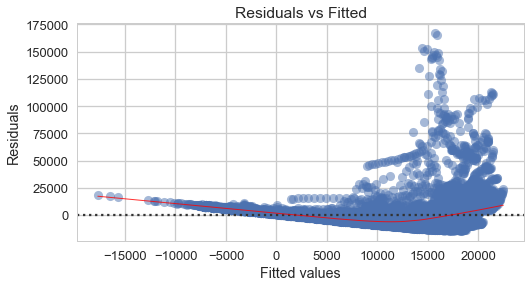

In [69]:
fig=plt.figure(figsize=(8,4))

#plot residplot using Seaborn package
fig.axes[0] = sns.residplot(fitted_values, 'income', data=clean_df, lowess=True, scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

fig.axes[0].set_title('Residuals vs Fitted')
fig.axes[0].set_xlabel('Fitted values')
fig.axes[0].set_ylabel('Residuals')
plt.savefig('Residuals vs. Fitted.png', bbox_inches='tight')

The purpose of this plot is to see if the residuals have non linear patterns. Equally distributed residuals around the horizontal lines indicate that there are no non-linear relationships. In this case, we see the opposite.  If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data. 

#### QQ Plot

In [70]:
# compute normalized residual values that will be used in the QQ plot
normalized_residuals = model_fit.get_influence().resid_studentized_internal

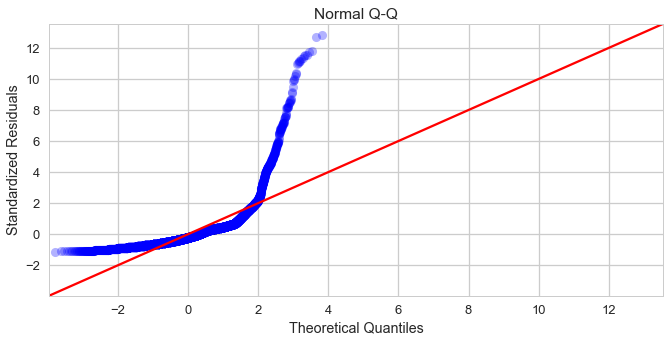

In [71]:
# import probability plot
from statsmodels.graphics.gofplots import ProbPlot

# create probability plot from normalized residuals
qq_plot = ProbPlot(normalized_residuals)
prob_qq = qq_plot.qqplot(line='45', alpha=0.3, color='blue', lw=2)

# add title, x and y label
prob_qq.axes[0].set_title('Normal Q-Q')
prob_qq.axes[0].set_xlabel('Theoretical Quantiles')
prob_qq.axes[0].set_ylabel('Standardized Residuals')
plt.savefig('Normal QQ.png', bbox_inches='tight')

QQ plot is a great way to tell if the sample was drawn from a normal distribution or not. In this case, we want to know if the residuals follow a normal distribution. In this case we can see that the residuals deviate a lot from the straight line, which would indicate that they were not drawn from a normal distribution.

#### Scale Location Plot

In [48]:
# fitted values 
fitted_values = model_fit.fittedvalues

# absolute squared normalized residual values
abs_sqrt_normalized_residuals = np.sqrt(np.abs(normalized_residuals))

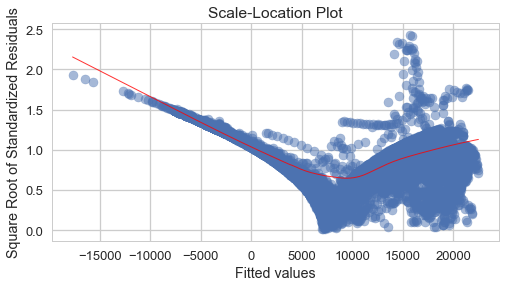

In [72]:
fig=plt.figure(figsize=(8,4))

# to plot this we need to overalay a scatter plot with the regplot

plt.scatter(fitted_values, abs_sqrt_normalized_residuals, alpha=0.5)
sns.regplot(fitted_values, abs_sqrt_normalized_residuals, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

fig.axes[0].set_title('Scale-Location Plot')
fig.axes[0].set_xlabel('Fitted values')
fig.axes[0].set_ylabel('Square Root of Standardized Residuals');
plt.savefig('Scale Location Plot.png', bbox_inches='tight')

The scale-location plot is usually used to show if residuals are spread equally along the ranges of predictors, in other words, using this plot, we can check the assumption of homoscedasticity. In this particular case, we can see that the residuals are not equally distributed along the range of predictiors which would indicate that residulas exhibit heteroscedasticity rather than homoscedasticity, as the variability of the residuals is unequal across the range of predictor values.

#### Residuals vs Leverage

In [73]:
# leverage, from statsmodels internals
leverage = model_fit.get_influence().hat_matrix_diag

# compute normalized residual values that will be used in the Residuals vs Leverage plot
normalized_residuals = model_fit.get_influence().resid_studentized_internal

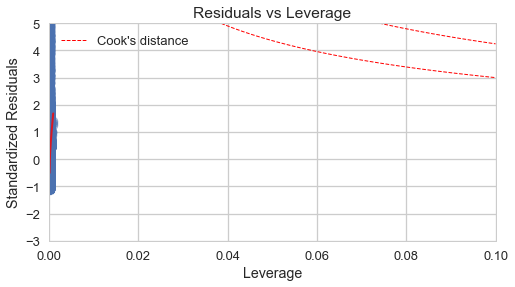

In [74]:
fig=plt.figure(figsize=(8,4))

plt.scatter(leverage, normalized_residuals, alpha=0.5)
sns.regplot(leverage, normalized_residuals, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

fig.axes[0].set_xlim(0, 0.10)
fig.axes[0].set_ylim(-3, 5)
fig.axes[0].set_title('Residuals vs Leverage')
fig.axes[0].set_xlabel('Leverage')
fig.axes[0].set_ylabel('Standardized Residuals')


# plot Cook's distance lines
# retrieved from https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034 on April 3, 2019
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, 0.100, 50), 'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, 0.100, 50)) # 1 line
plt.legend(loc='best')
plt.savefig('Residuals vs Leverage.png', bbox_inches='tight')


The plot above helps us find influental outliers. In these types of plots, we need to pay attention to the lower left and upper right corner of the plot, as those may indicate existance of these values. Although we do not see any data points within the Cook's distance line area, the rest of the data is highly clustered in the bottom left corner which could indicate some influential outliers in this model. In other words, it means that, if we were to remove some of those data points, the slope coefficient would change and affect the entire model.

### Clustering Analysis

In [55]:
# import necessary packages
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
sns.set_style('whitegrid')
sns.set_context('talk')
pd.options.mode.chained_assignment = None  # default='warn'

C:\Users\Justin\NEW\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Since I will be using the region variable for the K means model, I need to assign numerical values to the region values which will be added into the new column names "numerical_region". 

In [56]:
clean_df['region'].value_counts()

Europe & Central Asia         3921
Sub-Saharan Africa            3807
America                       2616
East Asia & Pacific           2113
Middle East & North Africa    1539
South Asia                     648
Name: region, dtype: int64

In [75]:
# create new column for numerical values of region
clean_df['numerical_region'] = ''

In [76]:
# add new numerical values to the new column based on the values in the region column
clean_df['numerical_region'][clean_df.region == 'Europe & Central Asia'] = 0
clean_df['numerical_region'][clean_df.region == 'Sub-Saharan Africa'] = 1
clean_df['numerical_region'][clean_df.region == 'America'] = 2
clean_df['numerical_region'][clean_df.region == 'East Asia & Pacific'] = 3
clean_df['numerical_region'][clean_df.region == 'Middle East & North Africa'] = 4
clean_df['numerical_region'][clean_df.region == 'South Asia'] = 5   

Once the numerical values for the regions are assigned, the model is created with features and target.

In [59]:
# create feature and targets for te model
feature= clean_df[['life','population','income']]
target = clean_df[['numerical_region']]
feature = np.array(feature)
target = np.array(target).astype('int32')

The next step is to split the dataset in the train and test portions using the train_test_split method. I chose to divide the dataset into 30% - 70% segments. The size of the train dataset is 70% of the original dataset, while the test dataset inlcudes 30% of the data.

In [60]:
# Split into training and testing sets
train, test, train_t, test_t  = train_test_split(feature, target, test_size=.3)
print('Size of training data')
print(train.shape)


Size of training data
(10250, 3)


Once this is completed, the best way to determine the number of clusters for this analysis is by using the Elbow Method. The idea behind this method is to run the k-means clustering on the dataset for a range of values of k and to see which one fits the best. Here I will be running in for the range of 1 to 6 clusters, as we have 6 regions in the Gapminder dataset.

In [61]:
# Identify number of clusters using the elbow method
clusters=range(1,7)
meandist=[]
 
for k in clusters:
    model=KMeans(n_clusters=k, algorithm = 'auto')
    model.fit(train)
    cluster_assignment=model.predict(train)
    meandist.append(sum(np.min(cdist(train, model.cluster_centers_, 'euclidean'), axis=1)) / train.shape[0])

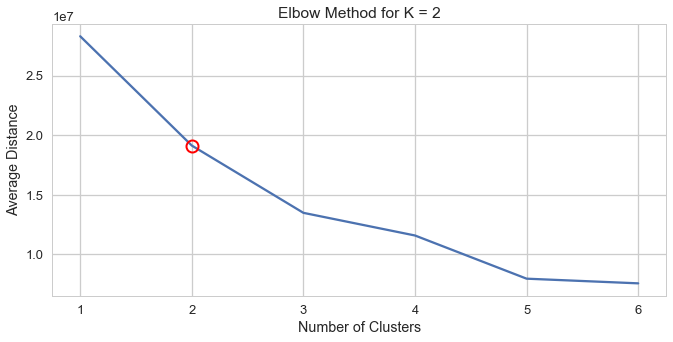

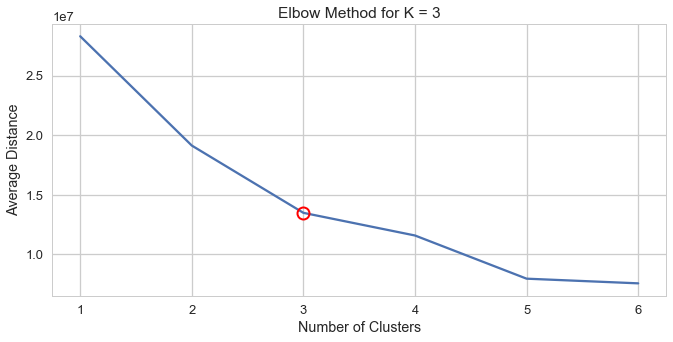

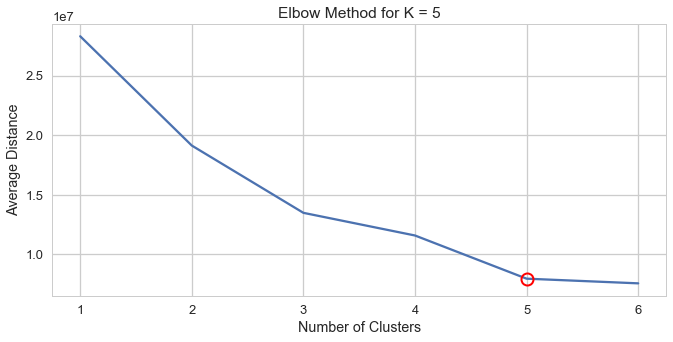

<Figure size 792x360 with 0 Axes>

In [63]:
# Visualize the elbow for k=2
k = 2
 
fig = plt.figure()
plt.plot(clusters, meandist)
plt.plot(clusters[(k-1)], meandist[(k-1)], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance')
plt.title('Elbow Method for K = 2')
plt.savefig('Elbow Method k = 2.png', bbox_inches='tight')
plt.show()


# Visualize the elbow for k=3
k = 3
 
fig = plt.figure()

plt.plot(clusters, meandist)
plt.plot(clusters[(k-1)], meandist[(k-1)], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance')
plt.title('Elbow Method for K = 3')
plt.savefig('Elbow Method k = 3.png', bbox_inches='tight')
plt.show()


# Visualize the elbow for k=5
k = 5
 
fig = plt.figure()

plt.plot(clusters, meandist)
plt.plot(clusters[(k-1)], meandist[(k-1)], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance')
plt.title('Elbow Method for K = 5')
plt.savefig('Elbow Method k = 5.png', bbox_inches='tight')
plt.show()

plt.tight_layout()

By visualy inspecting the elbow method charts, it appears that the best option for the number of clusters would be k=3 as if we imagine the line chart to look like an arm, then the "elbow" on the arm is the value of k that is the best which in this case is 3. Using this information, I will continue to visualize the K-Means clustering for the Gapminder dataset.

In [64]:
# Visualize K-Means with 3 clusters

model=KMeans(n_clusters=3, algorithm = 'auto')
model.fit(train)
target = model.predict(test)
print(target)

[2 2 2 ..., 2 2 2]


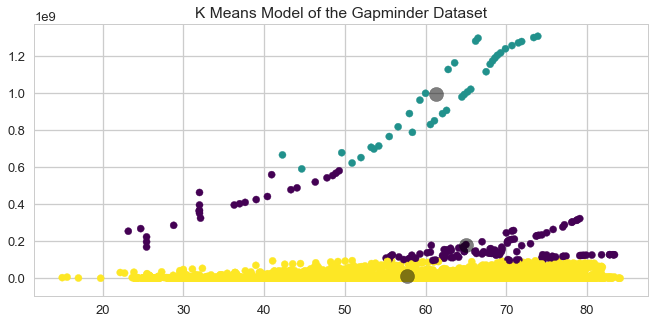

In [65]:
# Visualize K-Means
 
plt.scatter(test[:, 0], test[:, 1], c=target, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title ('K Means Model of the Gapminder Dataset')
plt.savefig('K Means.png', bbox_inches='tight')

This clustering visualization shows us that our dataset variables can be indeed predicted and clustered into 3 separate groups, based on the available feaures. We can clearly see where the boundary of one cluster begins and ends. However, as we determined with the Regression model, the life expectancy variable by itself is not sufficient to predict income values accurately.

### 6. Report Findings Summary

The above analysis have provided me with some very insightful information about the Gapminder dataset. It allowed me to answer the questions defined in the beginning of the analysis. 

The boxplot visualization of life expectancy variable by region showed that all regions except for the Sub-Saharan Africa and South Asia have a similar median, while these two regions exhibit much lower values. This is in line with the overall and the economic growth of those regions and presence of violence. An interesting fact is that the distribution of the Europe & Central Asia region is very small, which means that majority of population falls into that life expectancy range. However, from the noted boxplot, we can see that the same region includes many outliers on the bottom side, which indicates a low life expectancy for some individuals. Since the data includes life expectancy records from 1800, those outliers may include some violent incidents, such as the WWII that have caused to shorten the life expectancy of many young people and children. 

To analyze this little more, I have looked at the average life expectancy over the years, which indeed showed that there was a period between 1900 and 1950 where the average life expectancy dropped and was stagnant. This trend, however, changed after the WWII and other violent conflicts, as we can see a drastic increase in life expectancy. This can be attributed to a smaller number or wars and violence, but also advanced medical practices, improved life conditions, and other important aspects of people's life. 

The correlation analysis between the variables in this dataset have shown that there is a high correlaton between the life expectancy and the year in which the person lived, which is in line with the fact that with the improved life conditions over the years the life expectancy increased as well. Another significant correlation was noticed between the life expectancy and the income variable, which also indicates that higher income families tend to have better medical treatment and overall better living conditions.The population variable showed the lowest correlation with other variables which indicates that populations tend not to be affected by other variables and do not shrink but tend to exhibit negative and positive effects in other aspects.

The distribution of the income variable is skewed to the right in other words exhibits a positively skewed distribution. In case of a distribution such as this one, the mean is usually larger than the median and means that the right-hand tail is longer (larger) than the tail on the left side of the median.

Once the income distribution was inspected, the average income by country was plotted and extracted for top 10 countries. What I have found is that the Middle Eastern countries are very prominent in this category with Qatar having the highest average income, followed by Brunei and UAE. The only countries that do not belong in the Middle Eastern region and that exhibited similar income properties are Luxemburg, Switzerland, Andora, and Norway.

The life expectancy and income variables were used to complete the linear regression modeling with the help of the scikit learn linear_model package and the OLS (Ordinary Least Squares) model. Once the lm model was complete, it was used to predict the values of income based on the life expectancy figures also compute the linear model coefficient and intercept values. The model predicted negative values of income in some cases, which indicates that the model could be improved, as the original dataset did not include negative values, and overall negative values would include loans/credits in contrast to the income which is always a positive value.

The OLS model showed similar characteristics where the summary of the model showed that the Adj. R - Squared value was very low while the standard error 417 was very high. This is a clear indication the model could be drastically improved.

Regression assumption testing of the linear model was completed as well and has showed that the residual values were not drawn from a normal distribution per the QQ plot.The scale-location plot was used to show if residuals are spread equally along the ranges of predictors. This allowed to test the assumption of homoscedasticity. The finding concluded that the residuals in this data exhibit heteroscedasticity as the variability of the residuals is unequal across the range of predictor values. The residuals vs. levege helped locate any influental outliers. Athough there are not visible data points within the Cook's distance line area, the rest of the data is highly clustered around the y axis which could indicate some influential outliers in this model. In other words, it means that, if we were to remove some of the data points from the left bottom corner, the slope coefficient would change and affect the entire model.

In the last segment of the project the Elbow Method was used to determine the most appropriate number of clusters to be used in the K-Means clustering (unsupervise learning) model. According to this method, if we imagine the line chart to look like an arm, then the "elbow" on the arm is the value of k that is the best. In this particular case, the number of clusters was 3. The visualization of the K-Means clustering has shown that it was somewhat appropriate for this dataset and that it is depicting the values that fall under the area of each individual cluster as the cluster boundaries can be seen clearly.